# Using The API

The GIS object is the most important object when working with the ArcGIS API for Python. The GIS object represents the online GIS you are working with, be it ArcGIS Online or a Portal for ArcGIS. You use the GIS object to consume and publish GIS content and administrators may use it to manage GIS users, groups and datastores. The GIS object also includes a number of tools, including spatial analysis tools, big data analytics tools, raster analytics tools as well as helper services such as geocoding and geometry to help in your workflows.

To use the GIS object, import GIS from the arcgis.gis module:

In [1]:
from arcgis.gis import GIS

To create the GIS object, we pass your profile that contains the url and your login credentials. Please replace the credentials below with that of your org. To learn more about profiles, see [here](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#Storing-your-credentialls-locally).

Here, we're connecting to ArcGIS Online (the default GIS used when the url is not provided) as an anonymous user:

In [ ]:
gis = GIS(profile='your_online_profile')

Adding a '?' mark after an object and querying it brings up help for that object in the notebook:

In [7]:
gis?

The notebook provides intellisense and code-completion. Typing a dot after an object and hitting tab brings up a drop-down with its properties and methods:
![dropdown showing members of GIS class](http://esri.github.io/arcgis-python-api/notebooks/nbimages/01-dropdown.png)

The GIS object provides helper objects to manage the GIS resources, i.e. the users, groups, content and datastores. These helper utilities are in the form of helper objects named users, groups, content and datastores respectively. 

Each such helper object has similar patterns of usage: there are methods to get(), search() and create() the respective resources.

In [8]:
user = gis.users.get('rxsingh')

The ArcGIS API for Python is integrated with Jupyter Notebook to make it easy to visualize and interact with GIS resources. The user object has a rich representation that can be queried like this:

<User username:rxsingh>
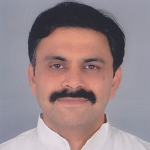

In [9]:
user

The resources are implemented as Python dictionaries. You can query for the resource properties using the <b><code>resource['property']</code></b> notation:

In [10]:
user['firstName']

'Rohit'

The properties are also available as properties on the resource object, so you can use the dot notation to access them:

In [11]:
user.lastName

'Singh'

The resources provide methods to update(), delete() and use the object.

The GIS object includes a map widget that can be used to visualize the content of your GIS as well as see the results of your analysis. Let's bring up a map of Palm Springs, CA:

In [ ]:
map = gis.map("Palm Springs, CA", zoomlevel=12)
map

![Sample output](http://esri.github.io/arcgis-python-api/notebooks/nbimages/01-palm-springs-map.png "(Sample output)")

We can search for content in our GIS. Let's search for Hiking Trails in the Palm Springs region. We do that by calling gis.content.search() and for each web map or web layers that gets returned, we can display its rich representation within the notebook:

<Item title:"Loop3Hahn_WFL" type:Feature Layer Collection owner:kgrahamACBCI>
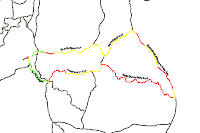

<Item title:"Palm Springs Trails" type:Feature Layer Collection owner:paniello_geodesign>
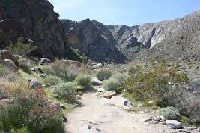

<Item title:"Loop2WestFork_WFL" type:Feature Layer Collection owner:kgrahamACBCI>
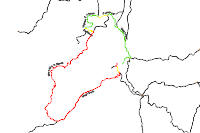

In [20]:
from IPython.display import display

items = gis.content.search('Palm Springs Trails', item_type="Feature Layer", outside_org=True)
for item in items[:3]:
    display(item)

We can add the returned web layers to our map. To add the ‘Palm Springs Trails’ layer returned above, we call map.add_layer() and pass in the corresponding layer. This adds the layer to the map widget we created above.

In [25]:
map.add_layer(items[1].layers[0])